In [1]:
from movie import compute_cost, fit, predict, init_random_matrix
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd

In [2]:
data = sio.loadmat("data/dado2.mat")
Y = data["Y"]
R = data["R"]

In [3]:
movieList = open("data/dado3.txt", "r").read().split("\n")[:-1]

In [4]:
print(
    f"Average rating for movie 1 (Toy Story): {np.sum(Y[0, :]*R[0, :]) / np.sum(R[0, :]):.2f}/5"
)

Average rating for movie 1 (Toy Story): 3.88/5


Text(0.5, 0, 'Users')

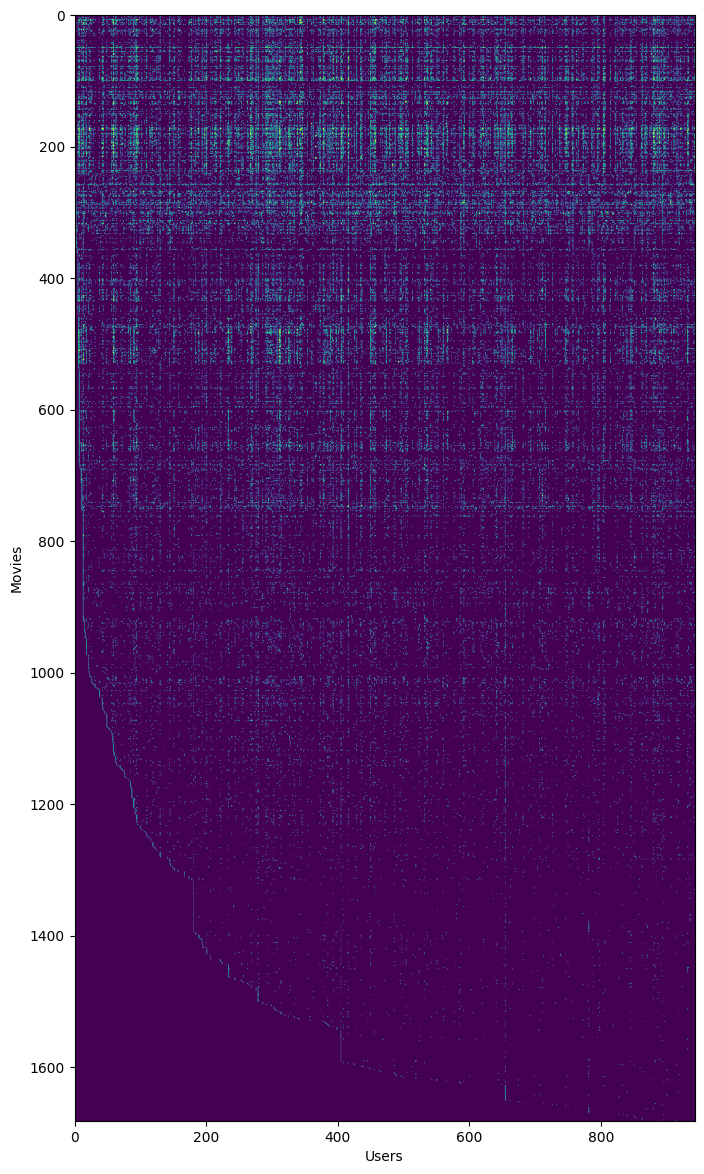

In [5]:
plt.figure(figsize=(8, 16))
plt.imshow(Y)
plt.ylabel("Movies")
plt.xlabel("Users")

In [6]:
my_ratings = np.zeros((1682, 1))

my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4
my_ratings[63] = 5
my_ratings[65] = 3
my_ratings[68] = 5
my_ratings[82] = 4
my_ratings[225] = 5
my_ratings[354] = 5

print("Ratings of the new user")
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print("Rating ", int(my_ratings[i]), " for the movie", movieList[i])

Y = np.hstack((my_ratings, Y))
R = np.hstack((my_ratings != 0, R))

Ratings of the new user
Rating  4  for the movie 1 Toy Story (1995)
Rating  3  for the movie 7 Twelve Monkeys (1995)
Rating  5  for the movie 12 Usual Suspects, The (1995)
Rating  4  for the movie 54 Outbreak (1995)
Rating  5  for the movie 64 Shawshank Redemption, The (1994)
Rating  3  for the movie 66 While You Were Sleeping (1995)
Rating  5  for the movie 69 Forrest Gump (1994)
Rating  4  for the movie 83 Much Ado About Nothing (1993)
Rating  2  for the movie 98 Silence of the Lambs, The (1991)
Rating  5  for the movie 226 Die Hard 2 (1990)
Rating  5  for the movie 355 Sphere (1998)


In [7]:
n_movies, n_users = Y.shape
n_features = 100
X = init_random_matrix(n_movies, n_features)
Theta = init_random_matrix(n_users, n_features)
params = np.append(X.flatten(), Theta.flatten())

In [8]:
J = compute_cost(X, Theta, Y, R)
print("Loss over random parameters: ", J)

Loss over random parameters:  686467.1131511403


In [9]:
maxiter = 1000
epsilon = 1e-6
trained_params, Y_mean = fit(X, Theta, Y, R, maxiter, epsilon)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 879
         Function evaluations: 1298
         Gradient evaluations: 1298


In [10]:
X = trained_params[: n_movies * n_features].reshape(n_movies, n_features)
Theta = trained_params[n_movies * n_features :].reshape(n_users, n_features)
predictions = predict(X, Theta, Y_mean)

In [11]:
my_predictions = predictions[:, 0][:, np.newaxis]
df = pd.DataFrame(np.hstack((my_predictions, np.array(movieList)[:, np.newaxis])))
df.sort_values(by=[0], ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
print("Best recomendations for the new user:\n")
for i in range(10):
    print("Predicted ", round(float(df[0][i]), 1), " for the movie", df[1][i])

Best recomendations for the new user:

Predicted  6.0  for the movie 550 Die Hard: With a Vengeance (1995)
Predicted  5.7  for the movie 96 Terminator 2: Judgment Day (1991)
Predicted  5.5  for the movie 517 Manhattan (1979)
Predicted  5.5  for the movie 963 Some Folks Call It a Sling Blade (1993)
Predicted  5.4  for the movie 603 Rear Window (1954)
Predicted  5.4  for the movie 709 Strictly Ballroom (1992)
Predicted  5.3  for the movie 117 Rock, The (1996)
Predicted  5.3  for the movie 127 Godfather, The (1972)
Predicted  5.2  for the movie 648 Quiet Man, The (1952)
Predicted  5.2  for the movie 405 Mission: Impossible (1996)
